In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df = loading_data(file_in, 'EC number')[:20]
df

,Entry,Sequence,EC number
0,F9VN79,MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...,3.1.26.4
1,Q60365,MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...,2.7.1.161
2,P50384,MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...,2.4.2.18
3,O59245,MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...,6.5.1.-; 3.1.-.-
4,Q8U4G1,MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...,2.5.1.23; 2.5.1.-; 2.5.1.104; 2.5.1.16
5,Q9UWY8,MMMGVELAFPKVVGKQVYGSLYECDEDVLKDTKRLEQIIKEAADIG...,4.1.1.50
6,Q8U195,MPRLIKDRVPTPERSVGERVRDFGEVNLGYSWELALREAERCLQCP...,1.8.1.19; 1.18.1.2
7,Q5JFG9,MGYNEQERAFIEWYPRGYGVGFKVKRRLFETQTEYQRLEIYETEGF...,2.5.1.104; 2.5.1.-; 2.5.1.16
8,O59248,MVDIVKRRDWEKKEKKKIAIERIDTLFTLAERVARYSPDLAKRYVE...,3.1.26.5
9,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6


(1248, 889)


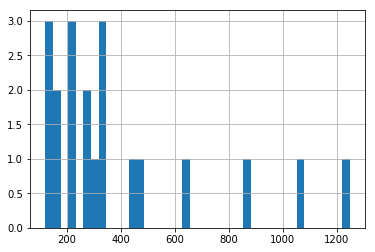

In [4]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [5]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [6]:
df_filt

,Entry,Sequence,EC number
0,F9VN79,MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...,3.1.26.4
1,Q60365,MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...,2.7.1.161
2,P50384,MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...,2.4.2.18
3,O59245,MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...,6.5.1.-; 3.1.-.-
4,Q8U4G1,MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...,2.5.1.23; 2.5.1.-; 2.5.1.104; 2.5.1.16
5,Q9UWY8,MMMGVELAFPKVVGKQVYGSLYECDEDVLKDTKRLEQIIKEAADIG...,4.1.1.50
6,Q8U195,MPRLIKDRVPTPERSVGERVRDFGEVNLGYSWELALREAERCLQCP...,1.8.1.19; 1.18.1.2
7,Q5JFG9,MGYNEQERAFIEWYPRGYGVGFKVKRRLFETQTEYQRLEIYETEGF...,2.5.1.104; 2.5.1.-; 2.5.1.16
8,O59248,MVDIVKRRDWEKKEKKKIAIERIDTLFTLAERVARYSPDLAKRYVE...,3.1.26.5
9,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6


In [7]:
dicti = creating_dict()

In [8]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [9]:
type(df_filt.loc[0,'Sequence']) is str

True

In [10]:
for i in ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']:
    print(i)
    seqs = processing_sequences(df_filt, i, max_lenn)
    print(seqs)

post_padding
0     MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...
1     MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...
2     MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...
3     MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...
4     MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...
5     MMMGVELAFPKVVGKQVYGSLYECDEDVLKDTKRLEQIIKEAADIG...
6     MPRLIKDRVPTPERSVGERVRDFGEVNLGYSWELALREAERCLQCP...
7     MGYNEQERAFIEWYPRGYGVGFKVKRRLFETQTEYQRLEIYETEGF...
8     MVDIVKRRDWEKKEKKKIAIERIDTLFTLAERVARYSPDLAKRYVE...
9     MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...
10    MKKRVVTAGTFDILHPGHYEILKFAKSLGDELIVIVARDETVKKLK...
11    MNNVEKAIEALKKGEIILVYDSDEREGETDMVVASQFITPEHIRIM...
12    MVMVMEKKPYIISNVGMTLDGKLATINNDSRISCEEDLIRVHKIRA...
13    MAVVKEVLEIAEKIKNMEIRGAGKIARSAAYALQLQAEKSKATNVD...
14    MRLSWVIGGAQGTGIDTAANIFGNAVASAGYYIYGNREYYSNIKGG...
15    MAAFTPQWNDWCPGCGNFGILNAEQQAIVELGVDTKNVVVVSGIGC...
16    MVEKFDTIYDYYVDKGYEPSKKRDIIAVFRVTPAEGYTIEQAAGAV...
17    MAEKFESRGIEEASSEVPTQRRCGAMEVH

In [13]:
processing_sequences(df_filt, 'stretch_padding', max_lenn)

0     M00000I00000I00000G00000Y00000F00000D00000G000...
1     M000000I000000I000000E000000G000000E000000V000...
2     M00N00I00N00E00I00L00K00K00L00I00N00K00S00D00L...
3     MVVPLKRIDKIRWEIPKFDKRMRVPGRVYADEVLLEKMKNDRTLEQ...
4     M00E00R00A00F00I00E00W00Y00P00R00G00Y00G00V00A...
5     M000000M000000M000000G000000V000000E000000L000...
6     M0P0R0L0I0K0D0R0V0P0T0P0E0R0S0V0G0E0R0V0R0D0F0...
7     M00G00Y00N00E00Q00E00R00A00F00I00E00W00Y00P00R...
8     M000000V000000D000000I000000V000000K000000R000...
9     M000N000V000E000E000M000K000K000I000A000A000K0...
10    M00000K00000K00000R00000V00000V00000T00000A000...
11    M000N000N000V000E000K000A000I000E000A000L000K0...
12    M000V000M000V000M000E000K000K000P000Y000I000I0...
13    M00A00V00V00K00E00V00L00E00I00A00E00K00I00K00N...
14    MR0LS0WV0IG0GA0QG0TG0ID0TA0AN0IF0GN0AV0AS0AG0Y...
15    M00A00A00F00T00P00Q00W00N00D00W00C00P00G00C00G...
16    M0V0E0K0F0D0T0I0Y0D0Y0Y0V0D0K0G0Y0E0P0S0K0K0R0...
17    M00A00E00K00F00E00S00R00G00I00E00E00A00S00

array([[12,  0,  0, ...,  0,  0, 19],
       [12,  0,  0, ...,  0,  0,  5],
       [12,  0,  0, ..., 18,  0,  7],
       ...,
       [12,  0,  0, ..., 21,  0,  4],
       [12,  0, 21, ..., 15,  0, 21],
       [12,  0,  0, ..., 15,  0, 17]], dtype=int32)

In [12]:
isinstance(max_lenn, float)

False

In [ ]:
int(max_lenn)

In [ ]:
prueba  = Target("AAAA")
seq1 = df_filt.loc[0,'Sequence']
seq2 = Target(seq1)

In [ ]:
UUU = seq2.padding_seq_position(900, 'rdm')

In [ ]:
UUU